In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, InputLayer, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### CIFAR 10 classes     airplane : 0 ,    automobile : 1  ,   bird : 2  ,   cat : 3  ,   deer : 4  ,   dog : 5  ,  frog : 6   ,  horse : 7  ,   ship : 8   ,  truck : 9

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## As we are using CNN, we don't need to flatten the input images before giving into the model

In [6]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
def my_model():
    inputs = InputLayer(input_shape=(32, 32, 3))
    x = Conv2D(32, 3)(inputs)
    x = BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = MaxPooling2D()(x)
    x = Conv2D(64, 3)(x)
    x = BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, 3)(x)
    x = BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    outputs = Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return 

In [10]:
model = my_model()

TypeError: Inputs to a layer should be tensors. Got: <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000185057A2B48>

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)        

### Keras Model Traiing APIs - https://keras.io/api/models/model_training_apis/

In [29]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(),
    metrics= ['accuracy']
)

In [32]:
EPOCHS = 20

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, verbose=2)

In [38]:
acc = history.history['accuracy']
loss=history.history['loss']
print(acc)
print(loss)

[0.6908000111579895, 0.6926400065422058, 0.6980999708175659, 0.700659990310669, 0.7021200060844421, 0.7035999894142151, 0.7045800089836121, 0.7052599787712097, 0.7083600163459778, 0.7125800251960754, 0.7090399861335754, 0.7141799926757812, 0.7150599956512451, 0.7102599740028381, 0.7147600054740906, 0.7140399813652039, 0.7172399759292603, 0.7193800210952759, 0.7151600122451782, 0.7158600091934204, 0.7200800180435181, 0.7157999873161316, 0.7188599705696106, 0.7184600234031677, 0.718559980392456, 0.7181800007820129, 0.719760000705719, 0.7174800038337708, 0.7184600234031677, 0.7200999855995178, 0.7196000218391418, 0.718500018119812, 0.7187399864196777, 0.7205399870872498, 0.7177799940109253, 0.7199599742889404, 0.7192599773406982, 0.7183200120925903, 0.7210400104522705, 0.7191600203514099, 0.7203199863433838, 0.720579981803894, 0.7209200263023376, 0.7221599817276001, 0.7230600118637085, 0.7215999960899353, 0.7222200036048889, 0.7216200232505798, 0.7206199765205383, 0.7222599983215332, 0.72

Text(0.5, 1.0, 'Training Accuracy and Loss')

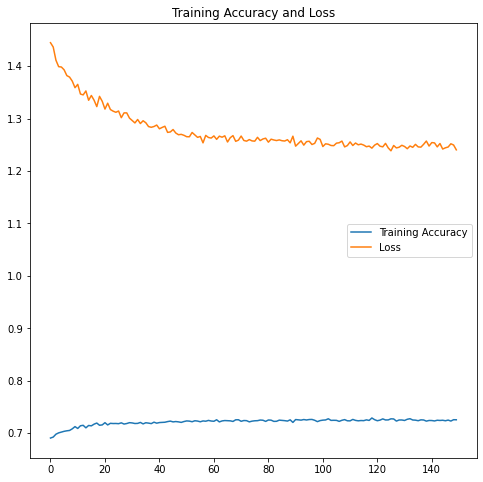

In [41]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [35]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 3s - loss: 1.3939 - accuracy: 0.6737


[1.3939411640167236, 0.6736999750137329]

In [36]:
y_pred = model.predict(x_test)

In [37]:
y_pred

array([[ -1.9200869 ,  -2.5995533 ,  -1.3146628 , ...,  -1.9381208 ,
         -1.107051  ,  -1.5714229 ],
       [  1.8000373 ,   4.689947  ,  -7.15194   , ..., -11.744177  ,
          6.4093304 ,   2.1904109 ],
       [ -0.5301312 ,   0.90670145,  -5.2943206 , ...,  -6.0055523 ,
          3.3065205 ,   2.9092138 ],
       ...,
       [ -6.5638847 ,  -7.8348904 ,  -1.3241173 , ...,  -0.22247437,
         -8.012566  ,  -5.4517984 ],
       [ -1.2321833 ,   1.1513953 ,  -1.4683433 , ...,  -3.381137  ,
         -2.1607597 ,  -1.6687024 ],
       [ -4.4135513 , -11.189379  ,  -1.8742888 , ...,   7.412634  ,
        -11.303839  ,  -8.092885  ]], dtype=float32)

In [42]:
model.save('saved_models/cnn_model.h5')